<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

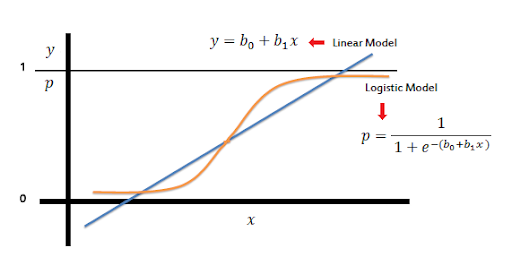

In [372]:
from sklearn.datasets import load_iris

In [373]:
dataset=load_iris()
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [374]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [375]:
import pandas as pd
import numpy as np

In [376]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [377]:
df['target']=dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [378]:
df['target'].unique()

array([0, 1, 2])

so there are 3 target classes


In [379]:
df[df['target']!=2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [380]:
df_copy=df[df['target']!=2]
df_copy['target'].unique()

array([0, 1])

## Feature selection (Binomial Logistic Regression)

In [381]:
## Independent and dependent features
X=df_copy.iloc[:,:-1]
y=df_copy.iloc[:,-1]
X,y

(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                 5.1               3.5                1.4               0.2
 1                 4.9               3.0                1.4               0.2
 2                 4.7               3.2                1.3               0.2
 3                 4.6               3.1                1.5               0.2
 4                 5.0               3.6                1.4               0.2
 ..                ...               ...                ...               ...
 95                5.7               3.0                4.2               1.2
 96                5.7               2.9                4.2               1.3
 97                6.2               2.9                4.3               1.3
 98                5.1               2.5                3.0               1.1
 99                5.7               2.8                4.1               1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 

In [382]:
#splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [383]:
from sklearn.linear_model import LogisticRegression

In [384]:
classification=LogisticRegression(max_iter=200)

In [385]:
classification

LogisticRegression(max_iter=200)

In [386]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [387]:
y_pred=classification.predict(X_test)

In [388]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

## Performance Metrics


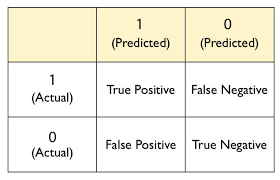

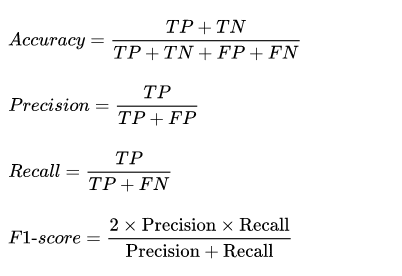

In [389]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [390]:
print(confusion_matrix(y_test,y_pred))

[[19  0]
 [ 0 14]]


In [391]:
print(accuracy_score(y_test,y_pred))

1.0


In [392]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## Introducing Cross Validation

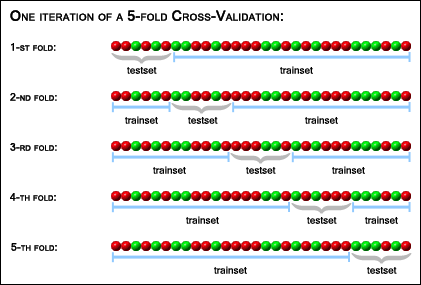

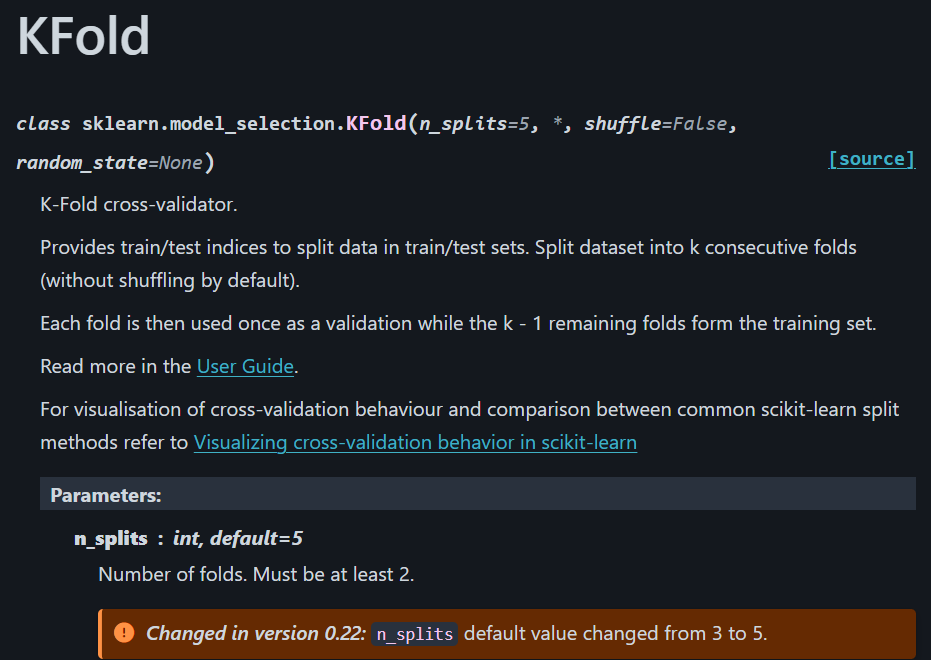

In [393]:
from sklearn.model_selection import KFold

In [394]:
cv=KFold(n_splits=5)

In [395]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [396]:
from sklearn.model_selection import cross_val_score

In [397]:
scores=cross_val_score(classification,X_train,y_train,scoring='accuracy',cv=cv)

In [398]:
scores

array([1., 1., 1., 1., 1.])

In [399]:
#mean of 5Fold CV scores
np.mean(scores)

np.float64(1.0)

# Logistic Regression HyperParameter Tuning

In [400]:
from sklearn.datasets import make_classification

In [401]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## GridsearchCV

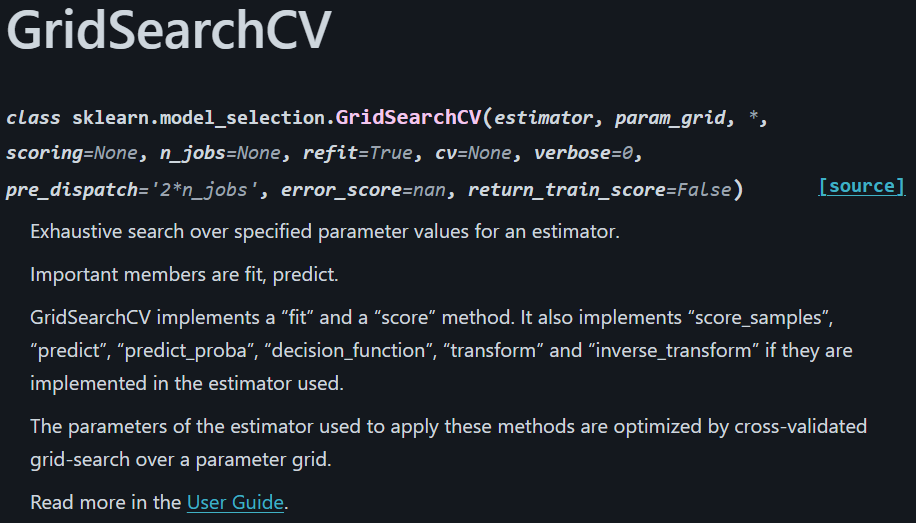

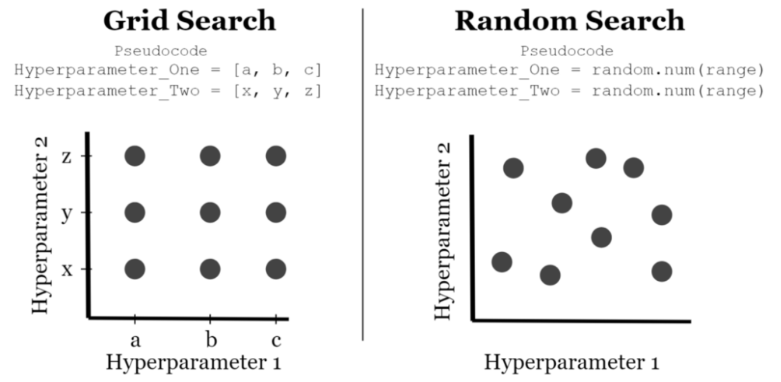

In [403]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [404]:
parameters={'penalty':('l1', 'l2','elasticnet'),'C':[1,10,20,30]}

In [405]:
clf=GridSearchCV(classifier,param_grid=parameters,cv=5)

In [406]:
## Splitting of Training data to train and validation
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1),
             param_grid={'C': [1, 10, 20, 30],
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [407]:
clf.best_params_ #best tuned hyperparameter

{'C': 1, 'penalty': 'l2'}

In [408]:
clf.best_score_

np.float64(0.8087500000000001)

In [409]:
classifier=LogisticRegression(C=1,penalty='l2')

In [410]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1)

In [411]:
y_pred=classifier.predict(X_test)

In [412]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

In [413]:
classifier.predict_proba(X_test)

array([[0.71651923, 0.28348077],
       [0.1950465 , 0.8049535 ],
       [0.12414182, 0.87585818],
       [0.05044049, 0.94955951],
       [0.8877372 , 0.1122628 ],
       [0.75067873, 0.24932127],
       [0.97980988, 0.02019012],
       [0.39209128, 0.60790872],
       [0.59915467, 0.40084533],
       [0.39298278, 0.60701722],
       [0.20417269, 0.79582731],
       [0.80256674, 0.19743326],
       [0.8642444 , 0.1357556 ],
       [0.92666604, 0.07333396],
       [0.00131606, 0.99868394],
       [0.04168894, 0.95831106],
       [0.56294841, 0.43705159],
       [0.89322189, 0.10677811],
       [0.29273031, 0.70726969],
       [0.00870462, 0.99129538],
       [0.71874782, 0.28125218],
       [0.51089475, 0.48910525],
       [0.76228576, 0.23771424],
       [0.73168731, 0.26831269],
       [0.10152661, 0.89847339],
       [0.04045506, 0.95954494],
       [0.57929547, 0.42070453],
       [0.00526033, 0.99473967],
       [0.03099815, 0.96900185],
       [0.96092766, 0.03907234],
       [0.

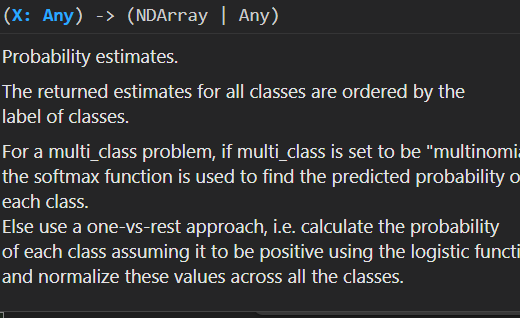

In [414]:
print("confusion matrix: ",confusion_matrix(y_test,y_pred))
print("\n accuracy score: ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

confusion matrix:  [[78 13]
 [29 80]]

 accuracy score:  0.79

               precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



## Randomised Search CV

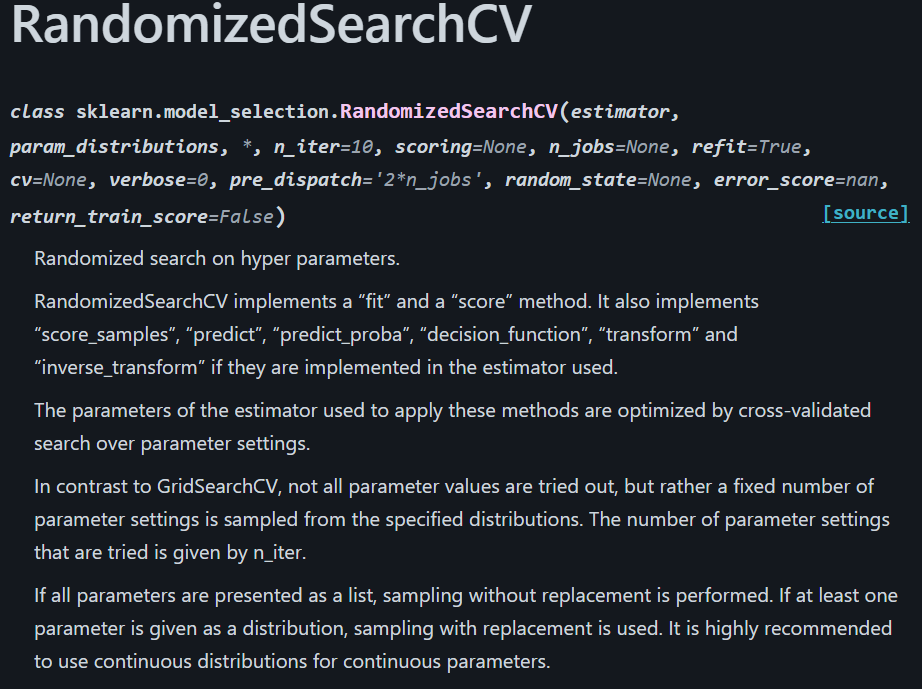

In [415]:
from sklearn.model_selection import RandomizedSearchCV

In [416]:
random_clf=RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5,n_iter=20)

In [417]:
random_clf

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet')})

In [418]:
random_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet')})

In [419]:
random_clf.best_params_

{'penalty': 'l2', 'C': 1}

In [420]:
random_clf.best_score_

np.float64(0.8087500000000001)

## Logistic Regression For Multiclass Classification

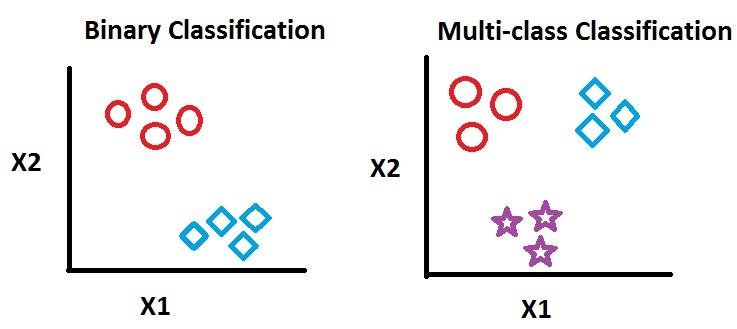

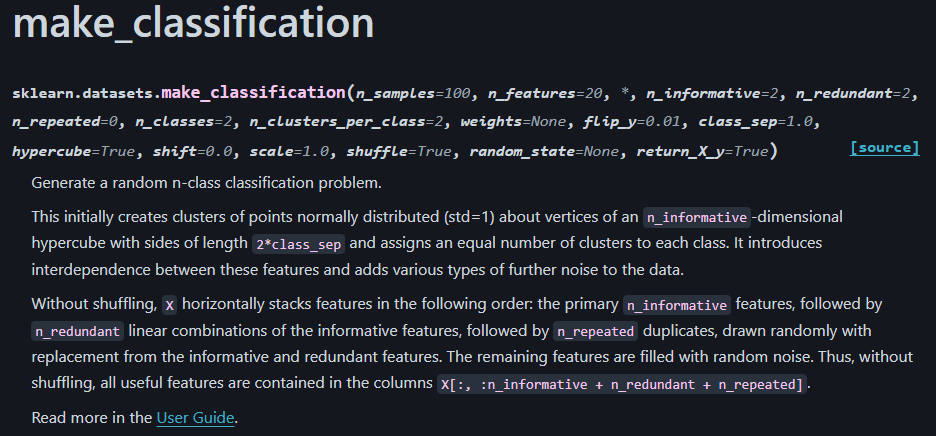

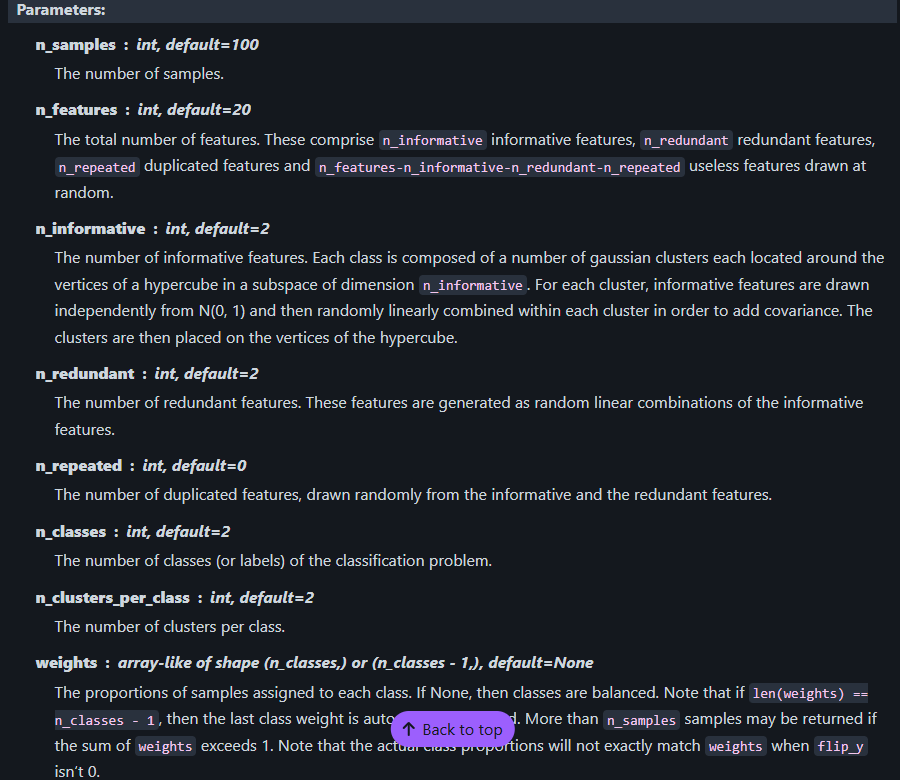

In [421]:
X, y = make_classification(n_samples=6000, n_features=10, n_informative=5, n_redundant=5, n_classes=4, random_state=1)

In [422]:
y

array([1, 1, 0, ..., 3, 3, 3])

In [423]:
model=LogisticRegression(multi_class='ovr', solver='lbfgs')

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [425]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [426]:
y_pred=model.predict(X_test)

In [427]:
model.predict_proba(X_test)

array([[0.20437635, 0.01038599, 0.2287011 , 0.55653656],
       [0.22008224, 0.03335145, 0.60299159, 0.14357472],
       [0.53347975, 0.18232673, 0.06796825, 0.21622527],
       ...,
       [0.10019379, 0.0012671 , 0.3386773 , 0.55986181],
       [0.21447572, 0.10819634, 0.22081968, 0.45650826],
       [0.12849409, 0.1179748 , 0.2407126 , 0.51281851]])

In [428]:
y_pred

array([3, 2, 0, ..., 3, 3, 3])

In [429]:
print("confusion matrix: ",confusion_matrix(y_test,y_pred))
print("\n accuracy score: ",accuracy_score(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))

confusion matrix:  [[173  56  48  27]
 [ 57 178  32  27]
 [ 40  24 147  90]
 [ 44  23  36 198]]

 accuracy score:  0.58

               precision    recall  f1-score   support

           0       0.55      0.57      0.56       304
           1       0.63      0.61      0.62       294
           2       0.56      0.49      0.52       301
           3       0.58      0.66      0.62       301

    accuracy                           0.58      1200
   macro avg       0.58      0.58      0.58      1200
weighted avg       0.58      0.58      0.58      1200

